# Import libs

In [21]:
from google.colab import drive
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, make_pipeline
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
drive.mount('/content/ggdrive', force_remount=True)

Mounted at /content/ggdrive


In [8]:
DATA_TRAIN = "/content/ggdrive/MyDrive/20221/"


# Import Data

In [12]:
data = pd.read_csv(DATA_TRAIN + "news.tsv", header=None, sep='\t')

data.columns=['News ID',
             'Category',
             'SubCategory',
             'Title',
             'Abstract',
             'URL',
             'Title Entities',
             'Abstract Entities']

Cái nhìn ban đầu về tập dữ liệu


In [13]:
data.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


Bỏ cột 5 và 6 vì không  dùng tới


In [15]:
data=data.iloc[:,:5]
data.head()

,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."


Đếm số lượng bản ghi mỗi cột

In [16]:
data.count()


News ID        51282
Category       51282
SubCategory    51282
Title          51282
Abstract       48616
dtype: int64

# Visualizing The Data

Category and Subcategory distribution in data

In [17]:
c=data[['Category','SubCategory']].value_counts()

In [18]:
index=[]
for i in c.index:
    index.append(np.array(i))
index=np.array(index)

In [19]:
df=pd.DataFrame(columns=['Category','Sub Category','Values'])
df['Category']=index[:,0]
df['Sub Category']=index[:,1]
df['Values']=c.values

In [22]:
px.bar(data_frame=df,x='Category',y='Values',color='Sub Category')

Từ đó, chúng ta có thể thấy rõ rằng hầu hết các tin tức đều nằm trên Category: news với Sub Category: newsus , tiếp theo là thể thao với tin tức bóng đá

## WordCloud For Sports News

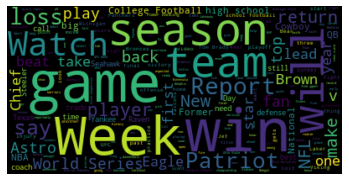

In [23]:
text=' '
for i in data[data['Category']=='sports']['Title']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

## Wordcloud for news

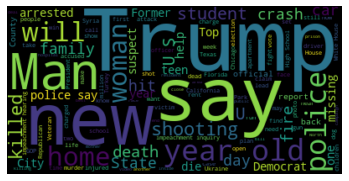

In [24]:
text=' '
for i in data[data['Category']=='news']['Title']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

Wow the main attraction of news has been Trump :)

## Histogram For Title Length

In [25]:
t=[]
for i in data['Title']:
    t.append(len(i))
px.histogram(t,color=data['Category'])

Well most of the titles are in the range of 50 to 100 words :) So if you are gonna write a news article keep the title in 50 - 100 words :)